In [161]:
#impoting the relevant libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
import seaborn as sns
from statsmodels.formula.api import ols 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [162]:
#Importing the data
df = pd.read_csv('C:/Users/Julie Musangi/Desktop/DS Course Material/Phase-2/PROJECT/Phase2project/dsc-group-6-phase-2-project/data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [163]:
df.describe() #To obtain summary statistics for the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [165]:
columns = (list(df.columns)) #Checking unique columns
columns


['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [166]:
print (f'The dataframe has {len(df.columns)} columns') #Printing number of columns 

The dataframe has 21 columns


In [167]:
#Correcting the data types
from datetime import datetime
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['date'] = pd.to_datetime(df['date'])

In [168]:
#Checking number of missing values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [169]:
#Proportion of missing values 
(df.isna().sum() / len(df)) * 100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     2.102144
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

##### 4 Columns have missing values. Since the highest proportion of the missing values of the 3 columns is 17%, we will drop them

In [170]:
#Checking for duplicates
df.duplicated().sum()

0

In [171]:
#Dropping View and Waterfront columns 
cleaned_df = df.drop(columns= ['view', 'waterfront'])
cleaned_df.columns 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [172]:
#Showing average correlation in relation to other features 
cleaned_df.drop('price', axis=1).corr().sum() / len(cleaned_df.columns)

id               0.038359
bedrooms         0.212404
bathrooms        0.296627
sqft_living      0.330085
sqft_lot         0.126247
floors           0.178926
condition       -0.012037
grade            0.293243
sqft_above       0.302095
sqft_basement    0.119596
yr_built         0.158346
yr_renovated     0.051580
zipcode         -0.059293
lat              0.063895
long             0.131503
sqft_living15    0.279508
sqft_lot15       0.130639
dtype: float64

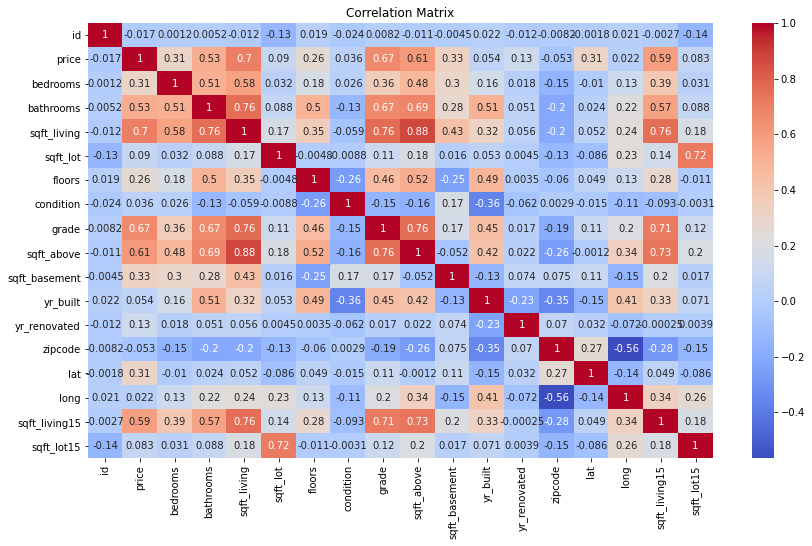

In [173]:
#Plotting the heatmap to determine columns to drop 
correlation_matrix = cleaned_df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### From the heatmap, we see a very high correlation between the Square feet above column and Square feet living. For this reason, we drop square feet above

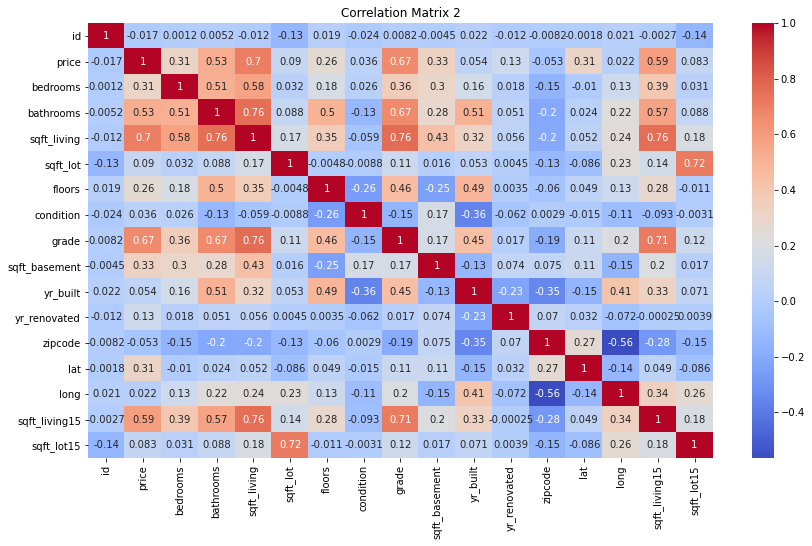

In [174]:
#dropping the identified column and plotting the heatmap again
cleaned_df = cleaned_df.drop('sqft_above', axis=1)
correlation_matrix2 = cleaned_df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix 2')
plt.show()

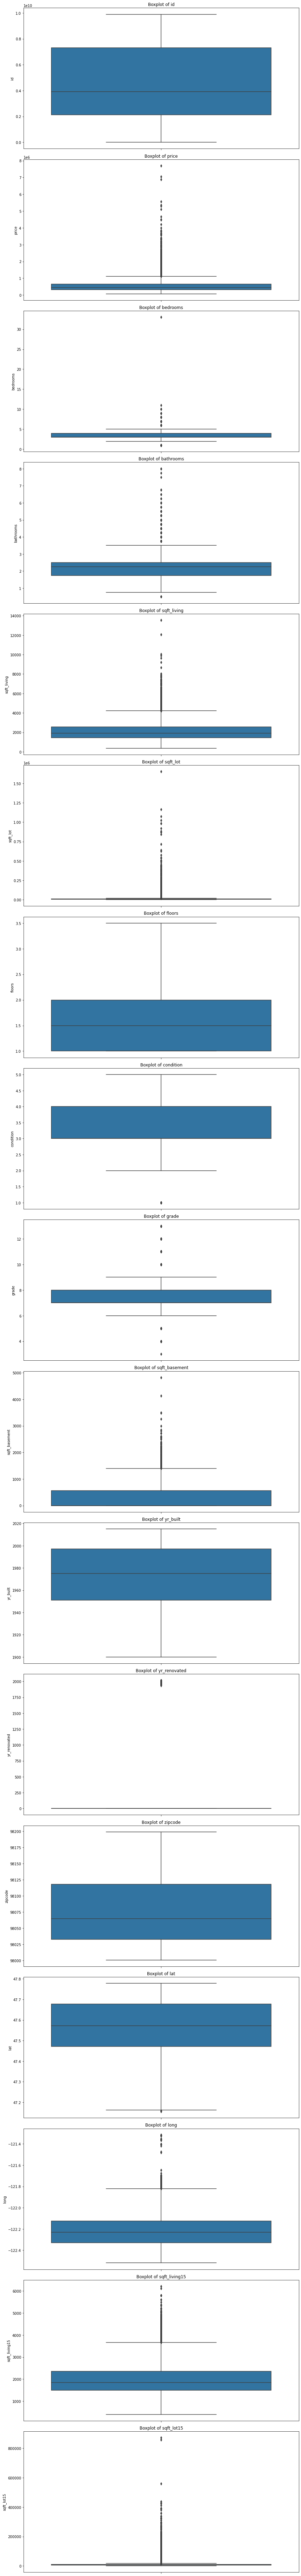

In [175]:
#Checking for outliers in the cleaned dataset using Box Plots
def plot_boxplots(df):
    num_columns = cleaned_df.select_dtypes(include=[np.number]).columns
    num_plots = len(num_columns)
    fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(12, 6 *num_plots))

    for i, column in enumerate(num_columns):
        sns.boxplot(y=cleaned_df[column], ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

plot_boxplots(cleaned_df)



In [176]:
# create a new feature that represents the total square footage of the home including the basement by combining sqft living and sqft above
cleaned_df['sqft_total'] = cleaned_df['sqft_basement'] + cleaned_df['sqft_living']
# Drop the original columns
cleaned_df = cleaned_df.drop(columns=['sqft_basement', 'sqft_living'])
cleaned_df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'sqft_total'],
      dtype='object')

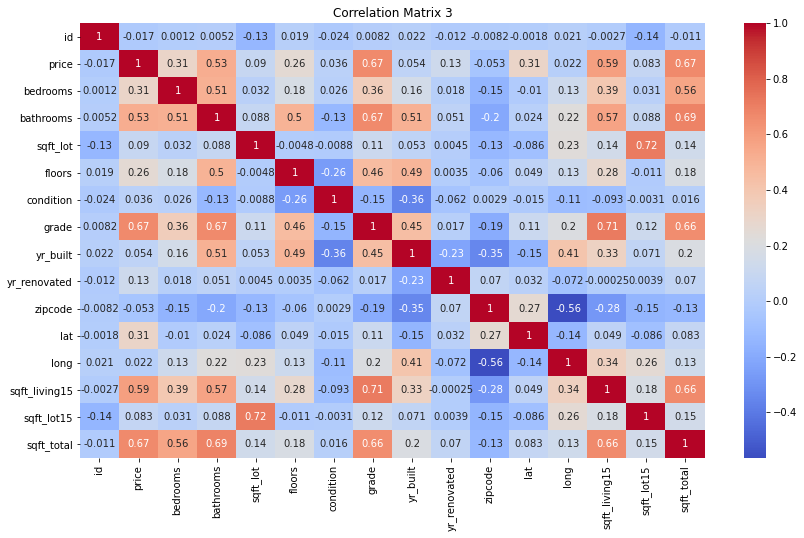

In [177]:
correlation_matrix3 = cleaned_df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix 3')
plt.show()

In [178]:
# Nomalize the  numerical columns data 
# Select only numerical columns for plotting
numerical_columns = cleaned_df.select_dtypes(include=['number']).columns
scaler =StandardScaler () # initialize the standard scaller
cleaned_df[numerical_columns] = scaler.fit_transform(cleaned_df[numerical_columns])

print(numerical_columns)  # Ensure correct columns are selected


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'sqft_total'],
      dtype='object')


In [179]:
cleaned_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_lot            0
floors              0
condition           0
grade               0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sqft_total        454
dtype: int64

In [180]:
current_year = datetime.now().year
cleaned_df['years_since_last_renovation'] = current_year - cleaned_df['yr_renovated']
cleaned_df['years_since_last_renovation'] = cleaned_df['years_since_last_renovation'].apply(lambda x: x if x > 0 else 0)
cleaned_df = cleaned_df.drop('yr_renovated', axis=1)
cleaned_df.head()

,id,date,price,bedrooms,bathrooms,sqft_lot,floors,condition,grade,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_total,years_since_last_renovation
0,0.886034,2014-10-13,-0.866716,-0.402903,-1.451073,-0.228182,-0.915552,-0.629986,-0.560800,-0.544678,1.869645,-0.352894,-0.305695,-0.943676,-0.260627,-1.010701,2024.209126
1,0.637413,2014-12-09,-0.006252,-0.402903,0.174486,-0.189739,0.937431,-0.629986,-0.560800,-0.680850,0.879210,1.161376,-0.746286,-0.432887,-0.187700,0.506063,2019.230819
2,0.365362,2015-02-25,-0.980773,-1.482493,-1.451073,-0.123139,-0.915552,-0.629986,-1.413190,-1.293626,-0.933473,1.283355,-0.135144,1.070292,-0.172190,-1.358116,0.000000
3,-0.727673,2014-12-09,0.173409,0.676687,1.149821,-0.243878,-0.915552,2.444427,-0.560800,-0.204247,1.084772,-0.283604,-1.272151,-0.914488,-0.284459,0.421328,2024.209126
4,-0.912887,2015-02-18,-0.082471,-0.402903,-0.150626,-0.169503,-0.915552,-0.629986,0.291589,0.544700,-0.073850,0.409293,1.200840,-0.272353,-0.192686,-0.587024,2024.209126


In [181]:
cleaned_df = cleaned_df.dropna(subset=['sqft_total'])

cleaned_df.isna().sum()

id                             0
date                           0
price                          0
bedrooms                       0
bathrooms                      0
sqft_lot                       0
floors                         0
condition                      0
grade                          0
yr_built                       0
zipcode                        0
lat                            0
long                           0
sqft_living15                  0
sqft_lot15                     0
sqft_total                     0
years_since_last_renovation    0
dtype: int64

### Model 1

In [182]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_total', 'sqft_lot', 'floors', 'condition', 'grade','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
x = cleaned_df[selected_features]
y = cleaned_df['price']

In [185]:
#Model training
# Split the data into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size = 0.2,random_state=42)

#Train a linear regression model
model = LinearRegression()

model.fit(x_train, y_train)
# Predict on the test set
y_pred = model.predict(x_test)


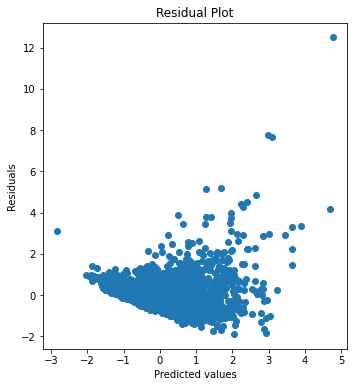

In [193]:
# Residual Plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot');

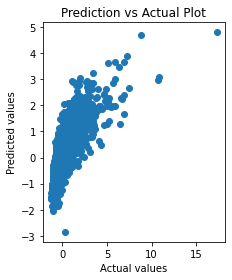

In [187]:
# Prediction vs Actual Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction vs Actual Plot')

plt.tight_layout()
plt.show()

In [194]:
cleaned_df['grade'].unique()

array([-0.56080027, -1.41318983,  0.2915893 ,  2.848758  ,  1.14397887,
       -2.2655794 ,  1.99636843,  3.70114756, -3.11796896, -3.97035853,
        4.55353713])

In [188]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 0.3832579587743178
Mean Squared Error (MSE): 0.38774111737011285
Root Mean Squared Error (RMSE): 0.6226886199137679
R-squared (R²): 0.6031578540822533


In [192]:
formula = 'y~x'
model = ols(formula,cleaned_df).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     2851.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:36:42   Log-Likelihood:                -19862.
No. Observations:               21143   AIC:                         3.975e+04
Df Residuals:                   21130   BIC:                         3.985e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.107e-05      0.004      0.007      0.994      -0.008       0.008
x[0]          -0.0801      0.005    -14.969      0.000      -0.091      -0.070
x[1]           0.0157      0.007      2.133      0.033       0.001       0.030
x[2]           0.3774      0.008     48.764      0.000       0.362       0.393
x[3]           0.0357      0.006      5.753      0.000       0.024       0.048
x[4]           0.0308      0.006      5.581      0.000       0.020       0.042
x[5]           0.0940      0.004     20.953      0.000       0.085       0.103
x[6]           0.3260      0.007     44.458      0.000       0.312       0.340
x[7]          -0.0412      0.005     -7.616      0.000      -0.052      -0.031
x[8]           0.2261      0.005     50.146      0.000       0.217       0.235
x[9]          -0.1243      0.005    -22.626      0.000      -0.135      -0.114
x[10]          0.1434      0.007     20.780      0.000       0.130       0.157
x[11]         -0.0182      0.006     -2.900      0.004      -0.030      -0.006
==============================================================================
Omnibus:                    19797.697   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2232199.085
Skew:                           4.169   Prob(JB):                         0.00
Kurtosis:                      52.642   Cond. No.                         4.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2

#My Recommendations
Under Problem Statement: Where did we get NorthWestern County from?
How about we go direct to the point instead of saying the team?
Business problem - Are we not supposed to state it? 
Under business understanding, there is a repitition of the source of the data used for the project? - Source - KC house data
The description of the df.info() code 
Update the names of the columns identified to have null values 
Have we elaborated the data cleaning bit? I think correcting data type is part of data cleaning and not feature engineering. Also handling missing values and removing outliers
Did we show that there are no duplicates?
Removing outliers...The return function should be outside the for loop
I may need help with this code that returns the KDEs and Box plots. KDE is used to estimate and visualize the probability desnity function for a continous random variable
I also do not understand the two codes after feature engineering. The one for adding important columns, the one with Lambda especialy 
How many feature engineerings do we have? 
Repetition under feature engineering - Scaling the data 3rd line
We did not deal with the high correlation between square ft above and square ft living. 
We did not apply the normalization to the numerical columns 

## Recommendations 

### For Potential Buyers:

1. Focus on Key Features for Better Investments

- Living Space: Prioritize properties with larger living spaces (sqft_living), as this significantly impacts house prices. A larger living area often translates to higher value and greater comfort.
- House Grade: Pay attention to the grade of the house. Higher-grade homes typically offer better quality and long-term value.
- Waterfront Views: If within budget, consider properties with waterfront views, as these can substantially increase the property's value and appeal.

2. Consider Location and Neighborhood Characteristics

- Geographic Location: Properties located at higher latitudes and lower longitudes tend to be more valued. Focus on these geographic characteristics when choosing a location.
- Neighboring Property Sizes: Evaluate the average living space (sqft_living15) and lot size (sqft_lot15) of neighboring properties. Areas with larger average sizes tend to appreciate more in value, providing better investment potential.

### For Homeowners

1. Enhance key features to maximize returns, and consider strategic renovations and maintenance


- Living Space Improvements: Consider expanding or improving the living space of your home. This can significantly boost its market value and make it more attractive to potential buyers.
- Maintain High House Grades: Regular maintenance and improvements to the home's grade can lead to higher returns. Focus on quality enhancements that boost the overall grade of your property.



By following these recommendations, potential buyers can make informed decisions to maximize their investments, while homeowners can enhance their properties to achieve higher returns when selling.